<a href="https://colab.research.google.com/github/shiva0345/shravan_shiva/blob/main/Admission_Chance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Chances of Admission to Graduate Programs Using Machine Learning  **

This project is about predicting the chances of admission of a student to a Graduate program based on:

1. GRE Scores (290 to 340)
2. TOEFL Scores (92 to 120)
3. University Rating (1 to 5)
4. Statement of Purpose (1 to 5)
5. Letter of Recommendation Strength (1 to 5)
6. Undergraduate CGPA (6.8 to 9.92)
7. Research Experience (0 or 1)
8. Chance of Admit (0.34 to 0.97)

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
admission =  pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Admission%20Chance.csv')

In [70]:
admission.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [71]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4    SOP               400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [72]:
admission.describe()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


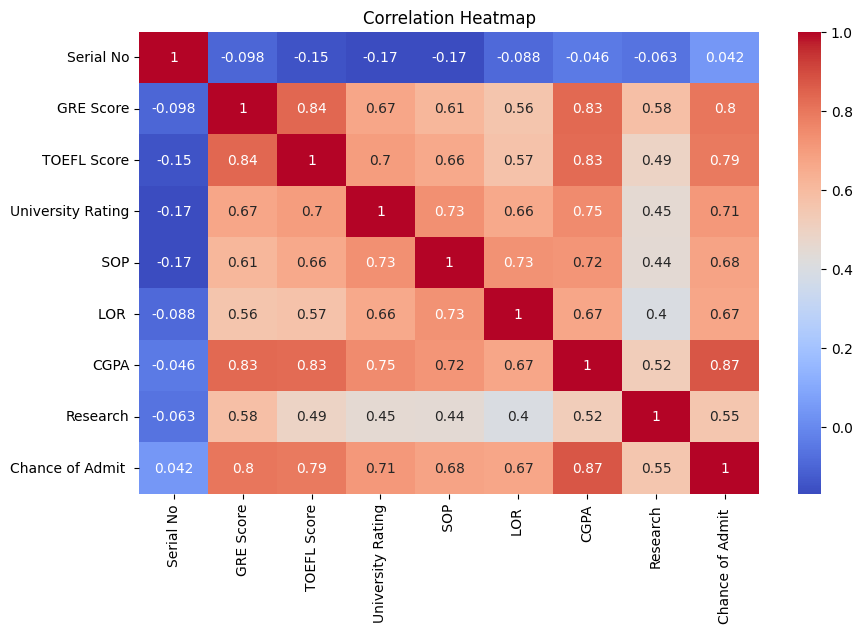

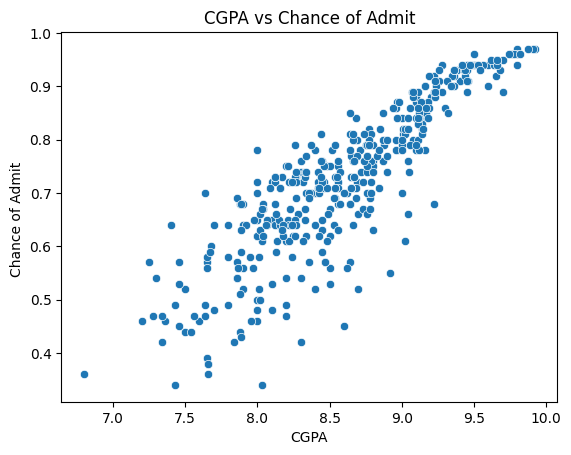

In [73]:
plt.figure(figsize=(10,6))
sns.heatmap(admission.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# CGPA vs Chance of Admit
sns.scatterplot(x=admission['CGPA'], y=admission['Chance of Admit '])
plt.title("CGPA vs Chance of Admit")
plt.show()

In [74]:
admission.columns

Index(['Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [75]:
y = admission['Chance of Admit ']

In [76]:
x = admission.drop(['Serial No', 'Chance of Admit '], axis=1)

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 2529)

In [78]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((280, 7), (120, 7), (280,), (120,))

In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [80]:
model.fit(x_train, y_train)

LinearRegression()

In [81]:
LinearRegression()

LinearRegression()

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8066078856630293

A high R² value indicates that a large portion of the variance in admission chances is explained by our model.

In [83]:
model.intercept_

np.float64(-1.2831244932033998)

In [84]:
model.coef_

array([ 0.00204057,  0.00287273,  0.00566887, -0.00380559,  0.01973175,
        0.11314449,  0.02061553])

In [85]:
y_pred = model.predict(x_test)

In [86]:
y_pred

array([0.71426327, 0.72534136, 0.69677103, 0.66566584, 0.57483872,
       0.93087527, 0.93701113, 0.72361387, 0.81130158, 0.62223963,
       0.59629648, 0.80084072, 0.52537944, 0.79174558, 0.84064992,
       0.66429594, 0.65136589, 0.66990687, 0.75794085, 0.86072023,
       0.66088101, 0.85570763, 0.84777425, 0.95033179, 0.68750762,
       0.65907671, 0.65279623, 0.5709259 , 0.55895645, 0.57990205,
       0.54497918, 0.7570717 , 0.69682571, 0.77286067, 0.64320811,
       0.5183554 , 0.43816818, 0.84654064, 0.90398354, 0.80517781,
       0.72218971, 0.72882587, 0.68145136, 0.88592237, 0.77208852,
       0.78778085, 0.95526121, 0.88586486, 0.59980416, 0.50690214,
       0.59947098, 0.63380406, 0.82841217, 0.44911724, 0.71068577,
       0.77335748, 0.68851557, 0.64486026, 0.85537724, 0.65517768,
       0.65046031, 0.90818978, 0.63422429, 0.68658606, 0.72150268,
       0.69030545, 0.59381287, 0.93813035, 0.58997351, 0.91542587,
       0.59283415, 0.93351713, 0.59478751, 0.71380389, 0.54346

In [87]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [88]:
mean_absolute_error(y_test,y_pred)

0.04400128934232651

In [89]:
mean_absolute_percentage_error(y_test,y_pred)

0.07575278864605438

In [90]:
mean_squared_error(y_test,y_pred)

0.004038263715495693

In this project, we built a Linear Regression model to predict the Chance of Admission of a student into a graduate program based on various academic and profile features such as GRE score, TOEFL score, University Rating, SOP, LOR, CGPA, and Research Experience.

After preprocessing the data and training the model using a 70-30 train-test split, the model achieved the following performance on the test data:

Mean Absolute Error (MAE): 0.0440

Mean Absolute Percentage Error (MAPE): 7.57%

Mean Squared Error (MSE): 0.0040

These results indicate that the model performs reasonably well in predicting the admission chances with relatively low error margins.

The coefficients of the model revealed that CGPA, Research, and LOR strength had a stronger positive influence on the chance of admission compared to other features, which aligns with common academic selection criteria.

Overall, this model can be a useful tool for students to estimate their likelihood of admission into graduate programs and identify which areas (e.g., GRE, CGPA, SOP) they can improve to increase their chances.